Import data

In [1]:
%pip install pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from itertools import repeat

In [8]:
data_x = pd.read_csv('dp_with_labels.csv', header=None)
data_x.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,DP0001,0.068966,0.103448,0.103448,0.103448,0.103448,0.172414,0.137931,0.172414,0.137931,...,0.344828,0.275862,0.172414,0.310345,0.206897,0.310345,0.310345,0.448276,0.344828,0.689655
1,DP0002,0.068966,0.068966,0.103448,0.068966,0.103448,0.137931,0.103448,0.206897,0.137931,...,0.344828,0.310345,0.206897,0.310345,0.275862,0.310345,0.379310,0.482759,0.379310,0.689655
2,DP0003,0.041667,0.125000,0.125000,0.375000,0.208333,0.250000,0.375000,0.541667,0.208333,...,0.333333,0.250000,0.541667,0.458333,0.500000,0.208333,0.541667,0.375000,0.583333,0.250000
3,DP0004,0.090909,0.136364,0.136364,0.363636,0.272727,0.136364,0.500000,0.681818,0.181818,...,0.409091,0.363636,0.681818,0.500000,0.500000,0.545455,0.636364,0.409091,0.681818,0.500000
4,DP0005,0.045455,0.136364,0.136364,0.363636,0.272727,0.227273,0.454545,0.681818,0.227273,...,0.454545,0.318182,0.681818,0.545455,0.454545,0.500000,0.545455,0.318182,0.590909,0.409091


In [56]:
data_y_1 = repeat(0, 425)
data_y_2 = repeat(1, 400)
data_y_3 = repeat(2, 375)
data_y_4 = repeat(3, 350)
data_y = list(data_y_1) + list(data_y_2) + list(data_y_3) + list(data_y_4)
df_y = pd.DataFrame(data_y)
df_y.columns = ['label']
df_y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [57]:
df = pd.concat([data_x, df_y], axis=1)
df = df.iloc[: , 1:]
df.head()

,1,2,3,4,5,6,7,8,9,10,...,4088,4089,4090,4091,4092,4093,4094,4095,4096,label
0,0.068966,0.103448,0.103448,0.103448,0.103448,0.172414,0.137931,0.172414,0.137931,0.310345,...,0.275862,0.172414,0.310345,0.206897,0.310345,0.310345,0.448276,0.344828,0.689655,0
1,0.068966,0.068966,0.103448,0.068966,0.103448,0.137931,0.103448,0.206897,0.137931,0.310345,...,0.310345,0.206897,0.310345,0.275862,0.310345,0.379310,0.482759,0.379310,0.689655,0
2,0.041667,0.125000,0.125000,0.375000,0.208333,0.250000,0.375000,0.541667,0.208333,0.208333,...,0.250000,0.541667,0.458333,0.500000,0.208333,0.541667,0.375000,0.583333,0.250000,0
3,0.090909,0.136364,0.136364,0.363636,0.272727,0.136364,0.500000,0.681818,0.181818,0.181818,...,0.363636,0.681818,0.500000,0.500000,0.545455,0.636364,0.409091,0.681818,0.500000,0
4,0.045455,0.136364,0.136364,0.363636,0.272727,0.227273,0.454545,0.681818,0.227273,0.227273,...,0.318182,0.681818,0.545455,0.454545,0.500000,0.545455,0.318182,0.590909,0.409091,0


In [58]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
train_x = train.iloc[:, :-1]
train_y = train.iloc[:, -1]
test_x = test.iloc[:, :-1]
test_y = test.iloc[:, -1]

Task1: 2

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [59]:
x_train = train_x.to_numpy()
y_train = train_y.to_numpy()
x_test = test_x.to_numpy()
y_test = test_y.to_numpy()


x_train = x_train.astype(np.float32)  # 转换为 float32
y_train = y_train.astype(np.int64)    # 如果是分类任务，转换为 int64
x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.int64)

x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)
# x_train = x_train.unsqueeze(1)
# x_test = x_test.unsqueeze(1)

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [60]:
class data6300_a2_CNN(nn.Module):
    def __init__(self):
        super(data6300_a2_CNN, self).__init__()
        self.fc1 = nn.Linear(4096, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 4)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.bn1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x


In [36]:
model = data6300_a2_CNN()
print(model)

data6300_a2_CNN(
  (fc1): Linear(in_features=4096, out_features=64, bias=True)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=64, out_features=4, bias=True)
)


In [37]:
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [47]:
from tqdm import tqdm

In [48]:
def train_model(model, train_loader, criteria, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        train_loader_tqdm = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs}', leave=True)

        for inputs , labels in train_loader_tqdm:
            outputs = model(inputs)
            loss = criteria(outputs, labels)

            
            optimizer.zero_grad()
        
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            train_loader_tqdm.set_postfix(loss=running_loss/(total/len(labels)), accuracy= correct / total)
        
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct / total
        print(f'Epoch {epoch + 1} / {epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')


In [61]:
train_model(model, train_loader, criteria, optimizer, epochs=10)

Epoch 1/10: 100%|██████████| 39/39 [00:00<00:00, 45.59it/s, accuracy=0.243, loss=1.05]


Epoch 1 / 10, Loss: 1.3947, Accuracy: 0.2427


Epoch 2/10: 100%|██████████| 39/39 [00:00<00:00, 71.35it/s, accuracy=0.284, loss=1.05]


Epoch 2 / 10, Loss: 1.3847, Accuracy: 0.2839


Epoch 3/10: 100%|██████████| 39/39 [00:00<00:00, 79.02it/s, accuracy=0.266, loss=1.04]


Epoch 3 / 10, Loss: 1.3832, Accuracy: 0.2661


Epoch 4/10: 100%|██████████| 39/39 [00:00<00:00, 93.20it/s, accuracy=0.269, loss=1.04]


Epoch 4 / 10, Loss: 1.3820, Accuracy: 0.2685


Epoch 5/10: 100%|██████████| 39/39 [00:00<00:00, 79.52it/s, accuracy=0.295, loss=1.04]


Epoch 5 / 10, Loss: 1.3791, Accuracy: 0.2952


Epoch 6/10: 100%|██████████| 39/39 [00:00<00:00, 78.44it/s, accuracy=0.286, loss=1.04]


Epoch 6 / 10, Loss: 1.3809, Accuracy: 0.2863


Epoch 7/10: 100%|██████████| 39/39 [00:00<00:00, 96.69it/s, accuracy=0.278, loss=1.04]


Epoch 7 / 10, Loss: 1.3769, Accuracy: 0.2782


Epoch 8/10: 100%|██████████| 39/39 [00:00<00:00, 91.83it/s, accuracy=0.302, loss=1.04]


Epoch 8 / 10, Loss: 1.3766, Accuracy: 0.3024


Epoch 9/10: 100%|██████████| 39/39 [00:00<00:00, 85.99it/s, accuracy=0.319, loss=1.04]


Epoch 9 / 10, Loss: 1.3735, Accuracy: 0.3194


Epoch 10/10: 100%|██████████| 39/39 [00:00<00:00, 100.78it/s, accuracy=0.31, loss=1.03] 

Epoch 10 / 10, Loss: 1.3672, Accuracy: 0.3097


In [62]:
def evaluate_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        test_acc = correct / total
        print(f'Test Accuracy: {test_acc:.4f}')

In [63]:
evaluate_model(model, test_loader)

Test Accuracy: 0.2742


In [65]:
import matplotlib.pyplot as plt

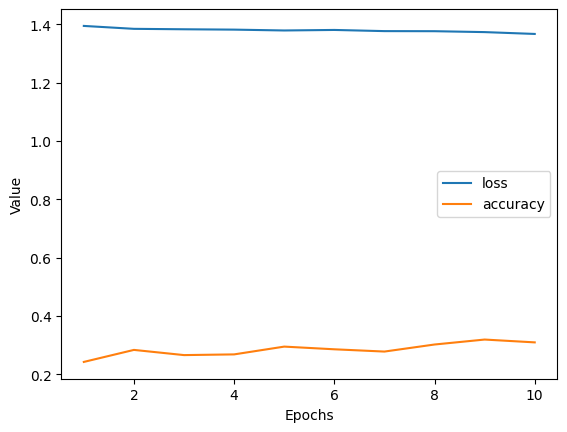

In [66]:
x = [1,2,3,4,5,6,7,8,9,10]
loss = [1.3947, 1.3847, 1.3832, 1.3820, 1.3791, 1.3809, 1.3769, 1.3766, 1.3735, 1.3672]
accuracy = [0.2427, 0.2839, 0.2661, 0.2685, 0.2952, 0.286, 0.2782, 0.3024, 0.3194, 0.3097]

plt.plot(x, loss, label='loss')
plt.plot(x, accuracy, label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()

Model 2: Add one more fully connected layers

In [67]:
class data6300_a2_CNN_2(nn.Module):
    def __init__(self):
        super(data6300_a2_CNN_2, self).__init__()
        self.fc1 = nn.Linear(4096, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 4)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.bn1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        return x

In [68]:
model_2 = data6300_a2_CNN_2()
print(model_2)

data6300_a2_CNN_2(
  (fc1): Linear(in_features=4096, out_features=64, bias=True)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)


In [69]:
train_model(model_2, train_loader, criteria, optimizer, epochs=10)
evaluate_model(model_2, test_loader)

Epoch 1/10: 100%|██████████| 39/39 [00:00<00:00, 70.58it/s, accuracy=0.262, loss=1.05]


Epoch 1 / 10, Loss: 1.3856, Accuracy: 0.2621


Epoch 2/10: 100%|██████████| 39/39 [00:00<00:00, 115.25it/s, accuracy=0.256, loss=1.05]


Epoch 2 / 10, Loss: 1.3858, Accuracy: 0.2565


Epoch 3/10: 100%|██████████| 39/39 [00:00<00:00, 101.89it/s, accuracy=0.271, loss=1.05]


Epoch 3 / 10, Loss: 1.3850, Accuracy: 0.2710


Epoch 4/10: 100%|██████████| 39/39 [00:00<00:00, 151.80it/s, accuracy=0.268, loss=1.05]


Epoch 4 / 10, Loss: 1.3856, Accuracy: 0.2677


Epoch 5/10: 100%|██████████| 39/39 [00:00<00:00, 123.88it/s, accuracy=0.252, loss=1.05]


Epoch 5 / 10, Loss: 1.3856, Accuracy: 0.2524


Epoch 6/10: 100%|██████████| 39/39 [00:00<00:00, 135.05it/s, accuracy=0.284, loss=1.04]


Epoch 6 / 10, Loss: 1.3840, Accuracy: 0.2839


Epoch 7/10: 100%|██████████| 39/39 [00:00<00:00, 141.63it/s, accuracy=0.262, loss=1.05]


Epoch 7 / 10, Loss: 1.3859, Accuracy: 0.2621


Epoch 8/10: 100%|██████████| 39/39 [00:00<00:00, 112.94it/s, accuracy=0.265, loss=1.05]


Epoch 8 / 10, Loss: 1.3860, Accuracy: 0.2645


Epoch 9/10: 100%|██████████| 39/39 [00:00<00:00, 134.38it/s, accuracy=0.285, loss=1.05]


Epoch 9 / 10, Loss: 1.3847, Accuracy: 0.2847


Epoch 10/10: 100%|██████████| 39/39 [00:00<00:00, 126.76it/s, accuracy=0.266, loss=1.05]


Epoch 10 / 10, Loss: 1.3872, Accuracy: 0.2661
Test Accuracy: 0.3065


In [73]:
class data6300_a2_CNN_3(nn.Module):
    def __init__(self):
        super(data6300_a2_CNN_3, self).__init__()
        self.fc1 = nn.Linear(4096,4096)
        self.fc2 = nn.Linear(4096, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.dropout = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 4)

    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = self.bn1(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        return x

In [74]:
model_3 = data6300_a2_CNN_3()
print(model_3)

data6300_a2_CNN_3(
  (fc1): Linear(in_features=4096, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=64, bias=True)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)


In [75]:
train_model(model_3, train_loader, criteria, optimizer, epochs=10)
evaluate_model(model_3, test_loader)

Epoch 1/10: 100%|██████████| 39/39 [00:02<00:00, 18.78it/s, accuracy=0.251, loss=1.06]


Epoch 1 / 10, Loss: 1.4018, Accuracy: 0.2508


Epoch 2/10: 100%|██████████| 39/39 [00:01<00:00, 20.25it/s, accuracy=0.24, loss=1.06]


Epoch 2 / 10, Loss: 1.4027, Accuracy: 0.2395


Epoch 3/10: 100%|██████████| 39/39 [00:01<00:00, 19.89it/s, accuracy=0.235, loss=1.06]


Epoch 3 / 10, Loss: 1.4079, Accuracy: 0.2347


Epoch 4/10: 100%|██████████| 39/39 [00:01<00:00, 20.49it/s, accuracy=0.235, loss=1.06]


Epoch 4 / 10, Loss: 1.4036, Accuracy: 0.2347


Epoch 5/10: 100%|██████████| 39/39 [00:01<00:00, 20.25it/s, accuracy=0.23, loss=1.06] 


Epoch 5 / 10, Loss: 1.3997, Accuracy: 0.2298


Epoch 6/10: 100%|██████████| 39/39 [00:01<00:00, 20.77it/s, accuracy=0.227, loss=1.06]


Epoch 6 / 10, Loss: 1.4009, Accuracy: 0.2274


Epoch 7/10: 100%|██████████| 39/39 [00:01<00:00, 20.12it/s, accuracy=0.252, loss=1.06]


Epoch 7 / 10, Loss: 1.4034, Accuracy: 0.2524


Epoch 8/10: 100%|██████████| 39/39 [00:01<00:00, 20.74it/s, accuracy=0.241, loss=1.06]


Epoch 8 / 10, Loss: 1.3981, Accuracy: 0.2411


Epoch 9/10: 100%|██████████| 39/39 [00:01<00:00, 19.77it/s, accuracy=0.244, loss=1.05]


Epoch 9 / 10, Loss: 1.3974, Accuracy: 0.2435


Epoch 10/10: 100%|██████████| 39/39 [00:02<00:00, 19.00it/s, accuracy=0.233, loss=1.06]


Epoch 10 / 10, Loss: 1.4044, Accuracy: 0.2331
Test Accuracy: 0.2742
